# 4 варіант

Fashion MNIST

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.preprocessing import OneHotEncoder


# Використовуємо pandas тому що так набагато швидше завантажити дані
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

Перевіримо нормалізацію

In [23]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


Дані потрібно буде нормалізувати

In [24]:
X_train, y_train_not_encoded = train.iloc[:, 1:].values, train['label'].values
X_test, y_test_not_encoded = test.iloc[:, 1:].values, test['label'].values
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train_not_encoded.shape}, y_test shape: {y_test_not_encoded.shape}, ')

X_train shape: (60000, 784), X_test shape: (10000, 784), y_train shape: (60000,), y_test shape: (10000,), 


In [25]:
X_train = X_train = ((X_train / 255.) - .5) * 2
X_test = X_test = ((X_test / 255.) - .5) * 2

OHE = OneHotEncoder(categories=[np.arange(10)])

y_train_encoded = OHE.fit_transform(y_train_not_encoded.reshape(-1, 1)).toarray()
y_test_encoded = OHE.transform(y_test_not_encoded.reshape(-1, 1)).toarray()

In [26]:
pd.DataFrame(X_train[:, 0:10]).describe()

,0,1,2,3,4,5,6,7,8,9
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,-0.999993,-0.999952,-0.999723,-0.999201,-0.998055,-0.996773,-0.993680,-0.982759,-0.955435,-0.886363
std,0.000743,0.002126,0.009587,0.019238,0.033780,0.045774,0.064433,0.110536,0.186819,0.300663
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,-0.874510,-0.717647,0.772549,0.286275,0.780392,0.803922,0.756863,1.000000,0.992157,1.000000


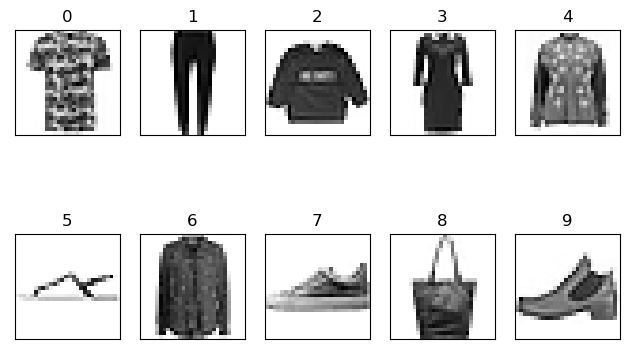

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train_not_encoded == i][0].reshape(28, 28)
    ax[i].set_title(f'{i}')
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

# Модель:

## Пряме розповсюдження

In [86]:
class Perceptron(object):
    def __init__(self, eta=0.001, random_state=17):
        self.eta = eta
        self.random = np.random.RandomState(random_state)
        self.w = None
        self.b = None
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}
        self.n_output = None
        self.n_features = None

    def _softmax(self, z):
        e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return e_z / np.sum(e_z, axis=1, keepdims=True)
    
    def _forward(self, X):
        z = np.dot(X, self.w) + self.b
        return self._softmax(z)

    def _compute_cost(self, y_enc, output):
        # predictions = np.clip(output, 1e-9, 1. - 1e-9)
        # N = predictions.shape[0]
        # ce = -np.sum(y_enc * np.log(predictions + 1e-9))
        # return ce
        term1 = -y_enc * (np.log(output + 1e-5))
        term2 = (1. - y_enc) * np.log(1. - output + 1e-5)
        cost = np.sum(term1 - term2)

        return cost
    
    def fit(self, X_train, y_train, X_valid, y_valid, epochs):
        self.n_output = y_train.shape[1]
        self.n_features = X_train.shape[1]

        # Initialize weights and bias
        self.w = self.random.random((self.n_features, self.n_output))
        self.b = np.zeros(self.n_output)

        for epoch in tqdm(range(epochs)):
            # Forward propagation for training data
            output_train = self._forward(X_train)

            # Compute accuracy for training data
            y_train_pred = np.argmax(output_train, axis=1)
            accuracy_train = np.mean(np.argmax(y_train, axis=1) == y_train_pred)
            self.eval_['train_acc'].append(accuracy_train)
            
            # Compute cost for training data
            cost_train = self._compute_cost(y_train, output_train)
            
            self.eval_['cost'].append(cost_train)
            
            # Update weights and bias using gradient descent
            errors = y_train - output_train
            self.w += self.eta * np.dot(X_train.T, errors)
            self.b += self.eta * np.sum(errors, axis=0)
            
            
            
            # Forward propagation for validation data
            output_valid = self._forward(X_valid)


            # Compute accuracy for validation data
            y_valid_pred = np.argmax(output_valid, axis=1)
            accuracy_valid = np.mean(np.argmax(y_valid, axis=1) == y_valid_pred)
            self.eval_['valid_acc'].append(accuracy_valid)


            
            if epoch % 10 == 0:
                tqdm.write(f"Epoch {epoch}: Cost = {cost_train}, Train Acc. = {accuracy_train:.2f}%, Valid Acc. = {accuracy_valid:.2f}%")

        return self

    def predict(self, X):
        output = self._forward(X)
        return np.argmax(output, axis=1)

n_epochs = 100

nn = Perceptron()

nn.fit(X_train=X_train[:55000], 
       y_train=y_train_encoded[:55000],
       X_valid=X_train[55000:],
       y_valid=y_train_encoded[55000:], epochs=n_epochs)

  1%|          | 1/100 [00:00<00:40,  2.42it/s]

Epoch 0: Cost = 645517.4070250901, Train Acc. = 0.11%, Valid Acc. = 0.32%


 11%|█         | 11/100 [00:04<00:38,  2.33it/s]

Epoch 10: Cost = 649982.9886103023, Train Acc. = 0.48%, Valid Acc. = 0.56%


 21%|██        | 21/100 [00:09<00:33,  2.35it/s]

Epoch 20: Cost = 452754.9006391688, Train Acc. = 0.64%, Valid Acc. = 0.67%


 31%|███       | 31/100 [00:13<00:33,  2.05it/s]

Epoch 30: Cost = 459582.9048426669, Train Acc. = 0.64%, Valid Acc. = 0.64%


 41%|████      | 41/100 [00:18<00:25,  2.30it/s]

Epoch 40: Cost = 355957.84436091385, Train Acc. = 0.72%, Valid Acc. = 0.72%


 51%|█████     | 51/100 [00:22<00:21,  2.28it/s]

Epoch 50: Cost = 338241.0775060967, Train Acc. = 0.73%, Valid Acc. = 0.64%


 61%|██████    | 61/100 [00:27<00:18,  2.10it/s]

Epoch 60: Cost = 383413.4906849453, Train Acc. = 0.70%, Valid Acc. = 0.68%


 71%|███████   | 71/100 [00:32<00:12,  2.25it/s]

Epoch 70: Cost = 333594.7295958415, Train Acc. = 0.73%, Valid Acc. = 0.72%


 81%|████████  | 81/100 [00:36<00:08,  2.24it/s]

Epoch 80: Cost = 361368.4692194102, Train Acc. = 0.71%, Valid Acc. = 0.73%


 91%|█████████ | 91/100 [00:40<00:03,  2.34it/s]

Epoch 90: Cost = 360338.39301754197, Train Acc. = 0.71%, Valid Acc. = 0.64%


100%|██████████| 100/100 [00:44<00:00,  2.23it/s]


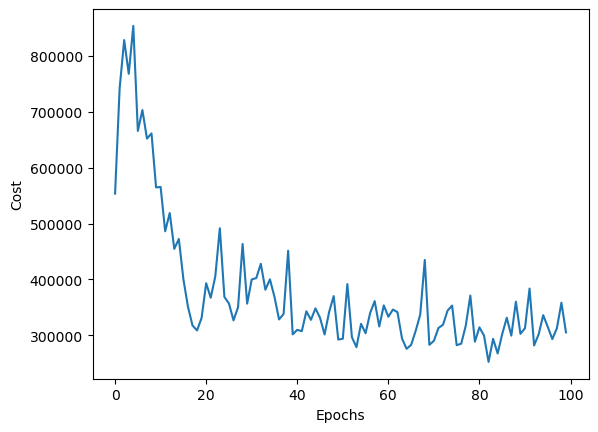

In [81]:
plt.plot(range(n_epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

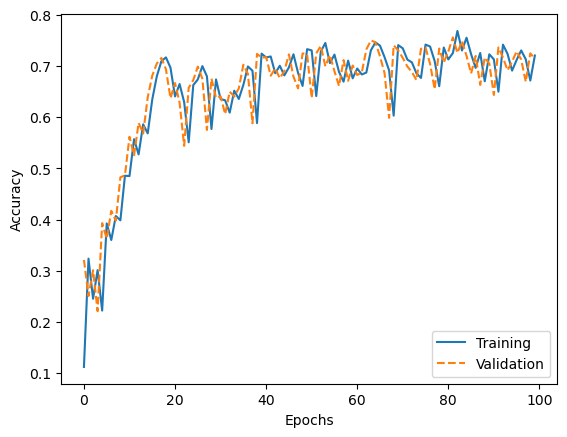

In [82]:
plt.plot(range(n_epochs), nn.eval_['train_acc'], 
         label='Training')
plt.plot(range(n_epochs), nn.eval_['valid_acc'], 
         label='Validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()

In [83]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test_not_encoded == y_test_pred)
       .astype(np.float32) / X_test.shape[0])

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 71.59%


## Модель зі скритими шарами

In [ ]:
class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_hidden : int (default: 30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatch_size : int (default: 1)
        Number of training examples per minibatch.
    seed : int (default: None)
        Random seed for initializing weights and shuffling.

    Attributes
    -----------
    eval_ : dict
      Dictionary collecting the cost, training accuracy,
      and validation accuracy for each epoch during training.

    """
    def __init__(self, n_hidden=30,
                 l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_examples]
            Target values.
        n_classes : int
            Number of classes

        Returns
        -----------
        onehot : array, shape = (n_examples, n_labels)

        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """Compute forward propagation step"""

        # step 1: net input of hidden layer
        # [n_examples, n_features] dot [n_features, n_hidden]
        # -> [n_examples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # step 2: activation of hidden layer
        a_h = self._sigmoid(z_h)

        # step 3: net input of output layer
        # [n_examples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_examples, n_classlabels]

        z_out = np.dot(a_h, self.w_out) + self.b_out

        # step 4: activation output layer
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, shape = (n_examples, n_labels)
            one-hot encoded class labels.
        output : array, shape = [n_examples, n_output_units]
            Activation of the output layer (forward propagation)

        Returns
        ---------
        cost : float
            Regularized cost

        """
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) +
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term
        
        # If you are applying this cost function to other
        # datasets where activation
        # values maybe become more extreme (closer to zero or 1)
        # you may encounter "ZeroDivisionError"s due to numerical
        # instabilities in Python & NumPy for the current implementation.
        # I.e., the code tries to evaluate log(0), which is undefined.
        # To address this issue, you could add a small constant to the
        # activation values that are passed to the log function.
        #
        # For example:
        #
        # term1 = -y_enc * (np.log(output + 1e-5))
        # term2 = (1. - y_enc) * np.log(1. - output + 1e-5)
        
        return cost

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_examples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_examples]
            Predicted class labels.

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data.

        Parameters
        -----------
        X_train : array, shape = [n_examples, n_features]
            Input layer with original features.
        y_train : array, shape = [n_examples]
            Target class labels.
        X_valid : array, shape = [n_examples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_examples]
            Sample labels for validation during training

        Returns:
        ----------
        self

        """
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        # weights for input -> hidden
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        # weights for hidden -> output
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs))  # for progress formatting
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iterate over training epochs
        for i in range(self.epochs):

            # iterate over minibatches
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # forward propagation
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ##################
                # Backpropagation
                ##################

                # [n_examples, n_classlabels]
                delta_out = a_out - y_train_enc[batch_idx]

                # [n_examples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)

                # [n_examples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_examples, n_hidden]
                delta_h = (np.dot(delta_out, self.w_out.T) *
                           sigmoid_derivative_h)

                # [n_features, n_examples] dot [n_examples, n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, delta_h)
                grad_b_h = np.sum(delta_h, axis=0)

                # [n_hidden, n_examples] dot [n_examples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, delta_out)
                grad_b_out = np.sum(delta_out, axis=0)

                # Regularization and weight updates
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # bias is not regularized
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

            #############
            # Evaluation
            #############

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)
            
            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) /
                         X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self

In [98]:
class MLPerceptron(object):
    def __init__(self, eta=0.001, n_hidden=30, random_state=17):
        self.eta = eta
        self.random = np.random.RandomState(random_state)
        self.n_hidden = n_hidden
        self.w1 = None
        self.b1 = None
        self.w2 = None
        self.b2 = None
        self.w3 = None
        self.b3 = None
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}
        self.n_output = None
        self.n_features = None
        
    def _softmax(self, z):
        e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return e_z / np.sum(e_z, axis=1, keepdims=True)

    def _relu(self, z):
        return np.maximum(0, z)

    def _forward(self, X):
        z_h = np.dot(X, self.w_h) + self.b_h

        a_h = self._relu(z_h)

        z_out = np.dot(a_h, self.w_out) + self.b_out

        a_out = self._softmax(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):

        term1 = -y_enc * (np.log(output))
        
        term2 = (1. - y_enc) * np.log(1. - output)
        
        cost = np.sum(term1 - term2)
        
        return cost

    def predict(self, X):
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid, epochs):
        self.n_output = y_train.shape[1]  # number of class labels
        self.n_features = X_train.shape[1]

        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(self.n_features, self.n_hidden))

        # weights for hidden -> output
        self.b_out = np.zeros(self.n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, self.n_output))

        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        # iterate over training epochs
        for epoch in tqdm(range(epochs)):

            z_h, a_h, z_out, a_out = self._forward(X_train)

            # [n_examples, n_classlabels]
            delta_out = a_out - y_train
            # [n_examples, n_hidden]
            relu_derivative_h = np.where(a_h > 0, 1, 0)

            # [n_examples, n_classlabels] dot [n_classlabels, n_hidden]
            # -> [n_examples, n_hidden]
            delta_h = (np.dot(delta_out, self.w_out.T) * relu_derivative_h)

            # [n_features, n_examples] dot [n_examples, n_hidden]
            # -> [n_features, n_hidden]
            grad_w_h = np.dot(X_train.T, delta_h)
            grad_b_h = np.sum(delta_h, axis=0)

            # [n_hidden, n_examples] dot [n_examples, n_classlabels]
            # -> [n_hidden, n_classlabels]
            grad_w_out = np.dot(a_h.T, delta_out)
            grad_b_out = np.sum(delta_out, axis=0)

            # Regularization and weight updates
            delta_w_h = grad_w_h
            delta_b_h = grad_b_h # bias is not regularized
            self.w_h -= self.eta * delta_w_h
            self.b_h -= self.eta * delta_b_h

            delta_w_out = grad_w_out
            delta_b_out = grad_b_out  # bias is not regularized
            self.w_out -= self.eta * delta_w_out
            self.b_out -= self.eta * delta_b_out

        #############
        # Evaluation
        #############

        # Evaluation after each epoch during training
        z_h, a_h, z_out, a_out = self._forward(X_train)
        
        cost = self._compute_cost(y_enc=y_train, output=a_out)

        y_train_pred = self.predict(X_train)
        y_valid_pred = self.predict(X_valid)

        train_acc = ((np.sum(np.argmax(y_train, axis=1) == y_train_pred)).astype(np.float32) /
                        X_train.shape[0])
        valid_acc = ((np.sum(np.argmax(y_valid, axis=1) == y_valid_pred)).astype(np.float32) /
                        X_valid.shape[0])
        
        if epoch % 10 == 0:
            tqdm.write(f"Epoch {epoch+1}: Cost = {cost}, Train Acc. = {train_acc*100:.2f}%, Valid Acc. = {valid_acc*100:.2f}%")

        self.eval_['cost'].append(cost)
        self.eval_['train_acc'].append(train_acc)
        self.eval_['valid_acc'].append(valid_acc)

        return self

In [99]:
n_epochs = 100

nn = MLPerceptron()

nn.fit(X_train=X_train[:55000], 
       y_train=y_train_encoded[:55000],
       X_valid=X_train[55000:],
       y_valid=y_train_encoded[55000:], epochs=n_epochs)

100%|██████████| 100/100 [00:51<00:00,  1.95it/s]
C:\Users\Kidma\AppData\Local\Temp\ipykernel_52364\3218387747.py:36: RuntimeWarning: divide by zero encountered in log
  term1 = -y_enc * (np.log(output))
C:\Users\Kidma\AppData\Local\Temp\ipykernel_52364\3218387747.py:36: RuntimeWarning: invalid value encountered in multiply
  term1 = -y_enc * (np.log(output))
C:\Users\Kidma\AppData\Local\Temp\ipykernel_52364\3218387747.py:38: RuntimeWarning: divide by zero encountered in log
  term2 = (1. - y_enc) * np.log(1. - output)
C:\Users\Kidma\AppData\Local\Temp\ipykernel_52364\3218387747.py:38: RuntimeWarning: invalid value encountered in multiply
  term2 = (1. - y_enc) * np.log(1. - output)


In [100]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test_not_encoded == y_test_pred)
       .astype(np.float32) / X_test.shape[0])

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 9.96%


In [101]:
import sys

class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_hidden : int (default: 30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatch_size : int (default: 1)
        Number of training examples per minibatch.
    seed : int (default: None)
        Random seed for initializing weights and shuffling.

    Attributes
    -----------
    eval_ : dict
      Dictionary collecting the cost, training accuracy,
      and validation accuracy for each epoch during training.

    """
    def __init__(self, n_hidden=30,
                 l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_examples]
            Target values.
        n_classes : int
            Number of classes

        Returns
        -----------
        onehot : array, shape = (n_examples, n_labels)

        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return np.max(0 ,z)

    def _forward(self, X):
        """Compute forward propagation step"""

        # step 1: net input of hidden layer
        # [n_examples, n_features] dot [n_features, n_hidden]
        # -> [n_examples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # step 2: activation of hidden layer
        a_h = self._sigmoid(z_h)

        # step 3: net input of output layer
        # [n_examples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_examples, n_classlabels]

        z_out = np.dot(a_h, self.w_out) + self.b_out

        # step 4: activation output layer
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, shape = (n_examples, n_labels)
            one-hot encoded class labels.
        output : array, shape = [n_examples, n_output_units]
            Activation of the output layer (forward propagation)

        Returns
        ---------
        cost : float
            Regularized cost

        """
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) +
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term
        
        # If you are applying this cost function to other
        # datasets where activation
        # values maybe become more extreme (closer to zero or 1)
        # you may encounter "ZeroDivisionError"s due to numerical
        # instabilities in Python & NumPy for the current implementation.
        # I.e., the code tries to evaluate log(0), which is undefined.
        # To address this issue, you could add a small constant to the
        # activation values that are passed to the log function.
        #
        # For example:
        #
        # term1 = -y_enc * (np.log(output + 1e-5))
        # term2 = (1. - y_enc) * np.log(1. - output + 1e-5)
        
        return cost

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_examples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_examples]
            Predicted class labels.

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data.

        Parameters
        -----------
        X_train : array, shape = [n_examples, n_features]
            Input layer with original features.
        y_train : array, shape = [n_examples]
            Target class labels.
        X_valid : array, shape = [n_examples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_examples]
            Sample labels for validation during training

        Returns:
        ----------
        self

        """
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        # weights for input -> hidden
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        # weights for hidden -> output
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs))  # for progress formatting
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iterate over training epochs
        for i in range(self.epochs):

            # iterate over minibatches
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # forward propagation
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ##################
                # Backpropagation
                ##################

                # [n_examples, n_classlabels]
                delta_out = a_out - y_train_enc[batch_idx]

                # [n_examples, n_hidden]
                sigmoid_derivative_h = np.where(a_h > 0, 1, 0)

                # [n_examples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_examples, n_hidden]
                delta_h = (np.dot(delta_out, self.w_out.T) *
                           sigmoid_derivative_h)

                # [n_features, n_examples] dot [n_examples, n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, delta_h)
                grad_b_h = np.sum(delta_h, axis=0)

                # [n_hidden, n_examples] dot [n_examples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, delta_out)
                grad_b_out = np.sum(delta_out, axis=0)

                # Regularization and weight updates
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # bias is not regularized
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

            #############
            # Evaluation
            #############

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)
            
            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) /
                         X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self

In [103]:
n_epochs = 50

nn = NeuralNetMLP(n_hidden=100, 
                  l2=0.01, 
                  epochs=n_epochs, 
                  eta=0.0005,
                  minibatch_size=100, 
                  shuffle=True,
                  seed=1)

nn.fit(X_train=X_train[:55000], 
       y_train=y_train_not_encoded[:55000],
       X_valid=X_train[55000:],
       y_valid=y_train_not_encoded[55000:])

TypeError: only integer scalar arrays can be converted to a scalar index